## Overview
This analysis investigates the potentially useful data provided by Dublin Bus as well as data from alternative sources like open weather map. Once the data is imported it is checked for missing and null values then new features created and the data sets combined to create a single data frame. The features in the DF are changed to their correct type based on some basic analysis and descriptive statistics are prepared on the results.

A section of analysis based on the initial investigation is provided followed by some a series of graphs to help understand the data in a more visual way. The analysis concludes with a data quality plan and some additional plots including a correlation plot of some of the features used. It must be noted however that the correlation plot provides little useful insight as the target feature is entire journey time and will throw off the correlation.

### Basic Setup

In [1]:
# Imports and general data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from sklearn import preprocessing
from scipy.stats import chi2_contingency
from matplotlib.backends.backend_pdf import PdfPages


# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

#Plotting inline
%matplotlib inline

In [ ]:
# Import data
leavetimes_df = pd.read_csv(r'\Data\DublinBus_2018\leavetimes_trim.csv')
stops_df = pd.read_csv(r'\Data\DublinBus_2018\stops_trim.csv')
trips_df = pd.read_csv(r'\Data\DublinBus_2018\trips_trim.csv')
vehicles_df = pd.read_csv(r'\Data\DublinBus_2018\vehicles_trim.csv')
distance_df = pd.read_csv(r'\Data\DublinBus_2018\distance_trim.csv')
weather_df = pd.read_csv(r'\Data\DublinBus_2018\Weather_2018.csv')

#### Simple Data Check

In [33]:
trips_df = pd.read_csv(r'C:\Users\turlo\OneDrive\Documents\MSC_Computer_Science\Summer_Project\JupyterNotebooks\FeatureEngineering\Feature_Production\trim_trips.csv', sep=';') # Choose only relevant columns

print("Dataframe length: ", trips_df.shape[0])
pd.concat([trips_df.isnull().sum(),trips_df.eq('').sum()],keys=['Nulls','Empty'],axis=1)

Dataframe length:  44520


,Nulls,Empty
DATASOURCE,0,0
DAYOFSERVICE,0,0
TRIPID,0,0
LINEID,0,0
ROUTEID,0,0
DIRECTION,0,0
PLANNEDTIME_ARR,0,0
PLANNEDTIME_DEP,0,0
ACTUALTIME_ARR,2618,0
ACTUALTIME_DEP,3197,0


In [34]:
# Adjust times from seconds to hh:mm:ss and get the expected and actual trip time
trips_df['PLANNEDTIME'] = (trips_df['PLANNEDTIME_ARR'] - trips_df['PLANNEDTIME_DEP'])
trips_df['ACTUALTIME'] = (trips_df['ACTUALTIME_ARR'] - trips_df['ACTUALTIME_DEP'])
trips_df['TRIPDIFF'] = (trips_df['PLANNEDTIME'] - trips_df['ACTUALTIME'])

trips_df['JUSTIFICATIONID'] = trips_df['JUSTIFICATIONID'].fillna(0)
trips_df['JUSTIFICATIONID'] = trips_df['JUSTIFICATIONID'].apply(lambda x: x if x <= 1 else 2)

trips_df = trips_df.sort_values(by=['JUSTIFICATIONID'], ascending=False)
trips_df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,PLANNEDTIME,ACTUALTIME,TRIPDIFF
11056,DB,16-JAN-18 00:00:00,6121526,40D,40D_102,1,53072,50400,52991.0,NaN,BasDef,NaN,0.0,2.0,25-JAN-18 14:34:13,",2825733,",2672,NaN,NaN
19140,DB,17-JAN-18 00:00:00,6122326,76A,76A_28,1,34478,29400,NaN,29256.0,BasDef,NaN,0.0,2.0,25-JAN-18 18:02:03,",1870501,",5078,NaN,NaN
19032,DB,17-JAN-18 00:00:00,6110904,140,140_21,2,65064,60600,65293.0,60411.0,BasDef,NaN,0.0,2.0,25-JAN-18 18:02:03,",2412709,",4464,4882.0,-418.0
12160,DB,18-JAN-18 00:00:00,6120223,33X,33X_48,1,66309,63000,NaN,63002.0,BasDef,NaN,0.0,2.0,26-JAN-18 21:12:42,",2533770,",3309,NaN,NaN
14902,DB,18-JAN-18 00:00:00,6114220,66,66_13,2,73703,70500,74219.0,NaN,BasDef,NaN,0.0,2.0,26-JAN-18 21:12:42,",2293841,",3203,NaN,NaN


In [35]:
trips_df.to_csv("trip_df_test.csv")

In [ ]:
leavetimes_df

In [165]:
leavetimes_df.nunique()

DATASOURCE             1
DAYOFSERVICE           1
TRIPID              7084
PROGRNUMBER          103
STOPPOINTID         4693
PLANNEDTIME_ARR    65652
PLANNEDTIME_DEP    65652
ACTUALTIME_ARR     65788
ACTUALTIME_DEP     65847
VEHICLEID            892
PASSENGERS             0
PASSENGERSIN           0
PASSENGERSOUT          0
DISTANCE               0
SUPPRESSED             2
JUSTIFICATIONID       16
LASTUPDATE             1
NOTE                   0
dtype: int64

In [166]:
print("Dataframe length: ", stops_df.shape[0])
pd.concat([stops_df.isnull().sum(),stops_df.eq('').sum()],keys=['Nulls','Empty'],axis=1)

Dataframe length:  4208


,Nulls,Empty
STOPID,0,0
STOPNAME,0,0
STOPPOINTID,0,0
STOPLAT,0,0
STOPLON,0,0


In [167]:
stops_df.nunique()

STOPID         4208
STOPNAME       2721
STOPPOINTID    4208
STOPLAT        4208
STOPLON        4208
dtype: int64

In [168]:
print("Dataframe length: ", trips_df.shape[0])
pd.concat([trips_df.isnull().sum(),trips_df.eq('').sum()],keys=['Nulls','Empty'],axis=1)

Dataframe length:  126


,Nulls,Empty
DATASOURCE,0,0
DAYOFSERVICE,0,0
TRIPID,0,0
LINEID,0,0
ROUTEID,0,0
DIRECTION,0,0
PLANNEDTIME_ARR,0,0
PLANNEDTIME_DEP,0,0
ACTUALTIME_ARR,5,0
ACTUALTIME_DEP,10,0


In [169]:
trips_df.nunique()

DATASOURCE           1
DAYOFSERVICE         1
TRIPID             126
LINEID               1
ROUTEID              4
DIRECTION            2
PLANNEDTIME_ARR    126
PLANNEDTIME_DEP     73
ACTUALTIME_ARR     121
ACTUALTIME_DEP     116
BASIN                1
TENDERLOT            0
SUPPRESSED           0
JUSTIFICATIONID      0
LASTUPDATE           1
NOTE               126
dtype: int64

In [170]:
print("Dataframe length: ", vehicles_df.shape[0])
pd.concat([vehicles_df.isnull().sum(),vehicles_df.eq('').sum()],keys=['Nulls','Empty'],axis=1)

Dataframe length:  272622


,Nulls,Empty
DATASOURCE,0,0
DAYOFSERVICE,0,0
VEHICLEID,0,0
DISTANCE,0,0
MINUTES,0,0
LASTUPDATE,0,0
NOTE,272622,0


In [171]:
vehicles_df.nunique()

DATASOURCE           1
DAYOFSERVICE       360
VEHICLEID         1152
DISTANCE        170498
MINUTES          57523
LASTUPDATE         360
NOTE                 0
dtype: int64

In [172]:
print("Dataframe length: ", distance_df.shape[0])
pd.concat([distance_df.isnull().sum(),distance_df.eq('').sum()],keys=['Nulls','Empty'],axis=1)

Dataframe length:  101


,Nulls,Empty
STOPID,0,0
STOP_SEQUENCE,0,0
DISTANCE_TRAVELLED,0,0


In [173]:
distance_df.nunique()

STOPID                101
STOP_SEQUENCE          52
DISTANCE_TRAVELLED    100
dtype: int64

In [174]:
print("Dataframe length: ", weather_df.shape[0])
weather_df.isna().sum()

Dataframe length:  8800


dt                        0
dt_iso                    0
timezone                  0
city_name                 0
lat                       0
lon                       0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              8800
grnd_level             8800
humidity                  0
wind_speed                0
wind_deg                  0
rain_1h                8734
rain_3h                8800
snow_1h                8800
snow_3h                8800
clouds_all                0
weather_id                0
weather_main              0
weather_description       0
weather_icon              0
dtype: int64

In [175]:
weather_df.nunique()

dt                     8760
dt_iso                 8760
timezone                  2
city_name                 1
lat                       1
lon                       1
temp                   2179
feels_like             2710
temp_min               1855
temp_max               1592
pressure                 63
sea_level                 0
grnd_level                0
humidity                 64
wind_speed              105
wind_deg                 57
rain_1h                  20
rain_3h                   0
snow_1h                   0
snow_3h                   0
clouds_all               90
weather_id               23
weather_main              8
weather_description      24
weather_icon             16
dtype: int64

#### Analysis
**weather_df** will use only `temp`, `feelslike` and `weather_main`

**vehicles_df** will not be used in analysis


The following features are not useful due to missing data or cardinality of 1:

**leavetimes_df** 
`PASSENGERS`, `PASSENGERSIN`, `PASSENGERSOUT`, `DISTANCE`, `SUPPRESSED`, `JUSTIFICATIONID`, `DATASOURCE`, `LASTUPDATE`

**trips_df** 
`TENDERLOT`, `SUPPRESSED`, `JUSTIFICATIONID`, `DATASOURCE`, `LASTUPDATE`


### Create Data Set
As the data is collected from multiple sources, the tables are first combined with only the relevant columns from each table being retained.

In [176]:
# Adjust times from seconds to hh:mm:ss and get the expected and actual trip time
trips_df['PLANNEDTIME'] = (trips_df['PLANNEDTIME_ARR'] - trips_df['PLANNEDTIME_DEP'])
trips_df['ACTUALTIME'] = (trips_df['ACTUALTIME_ARR'] - trips_df['ACTUALTIME_DEP'])
trips_df['ACTUALTIME_SECONDS'] = trips_df['ACTUALTIME']

trips_df['DATE'] = pd.to_datetime(trips_df['DAYOFSERVICE']).dt.strftime('%Y-%m-%d')
trips_df['HOUR'] = pd.to_datetime(trips_df['PLANNEDTIME_DEP'], unit='s').dt.strftime("%H:00:00")
trips_df['PLANNEDTIME_ARR'] = pd.to_datetime(trips_df['PLANNEDTIME_ARR'], unit='s').dt.strftime("%H:%M:%S")
trips_df['PLANNEDTIME_DEP'] = pd.to_datetime(trips_df['PLANNEDTIME_DEP'], unit='s').dt.strftime("%H:%M:%S")
trips_df['ACTUALTIME_ARR'] = pd.to_datetime(trips_df['ACTUALTIME_ARR'], unit='s').dt.strftime("%H:%M:%S")
trips_df['ACTUALTIME_DEP'] = pd.to_datetime(trips_df['ACTUALTIME_DEP'], unit='s').dt.strftime("%H:%M:%S")


leavetimes_df['PLANNEDTIME_ARR'] = pd.to_datetime(leavetimes_df['PLANNEDTIME_ARR'], unit='s').dt.strftime("%H:%M:%S")
leavetimes_df['PLANNEDTIME_DEP'] = pd.to_datetime(leavetimes_df['PLANNEDTIME_DEP'], unit='s').dt.strftime("%H:%M:%S")
leavetimes_df['ACTUALTIME_ARR'] = pd.to_datetime(leavetimes_df['ACTUALTIME_ARR'], unit='s').dt.strftime("%H:%M:%S")
leavetimes_df['ACTUALTIME_DEP'] = pd.to_datetime(leavetimes_df['ACTUALTIME_DEP'], unit='s').dt.strftime("%H:%M:%S")

trips_df['PLANNEDTIME'] = pd.to_datetime(trips_df['PLANNEDTIME'], unit='s').dt.strftime("%H:%M:%S")
trips_df['ACTUALTIME'] = pd.to_datetime(trips_df['ACTUALTIME'], unit='s').dt.strftime("%H:%M:%S")


weather_df['DATE'] = pd.to_datetime(weather_df['dt'], unit='s').dt.strftime("%Y-%m-%d")
weather_df['HOUR'] = pd.to_datetime(weather_df['dt'], unit='s').dt.strftime("%H:%M:%S")


In [177]:
# Combine data tables and keep only the relevant headings
result = pd.merge(trips_df[['DATE','TRIPID','LINEID','ROUTEID','DIRECTION','PLANNEDTIME','ACTUALTIME', 'ACTUALTIME_SECONDS', 'HOUR']],
                  leavetimes_df[['PROGRNUMBER','STOPPOINTID','PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP', 'TRIPID']],
                 on='TRIPID', 
                 how='left')

result = pd.merge(result,
                  stops_df[['STOPID','STOPNAME','STOPLAT','STOPLON','STOPPOINTID']],
                 on='STOPPOINTID', 
                 how='left')

result = pd.merge(result,
                  distance_df[['STOPID', 'DISTANCE_TRAVELLED']],
                 on='STOPID', 
                 how='left')

result = pd.merge(result,
                  weather_df[['temp', 'weather_main', 'HOUR', 'DATE']],
                  on=['HOUR', 'DATE'],
                 how='left')


### Initial Analysis
Combined data set has been made into a human readable set for our understanding. This may be changed when it comes to the actual modeling as it may be more useful to perform the analysis on id's rather than stop names etc.

For `ACTUALTIME` some of the journeys do not have an actual time , this may be possible to replace with the average or expected time. Or possibly we can caluclate from the first and last stop time.

In [178]:
# Sort the results to make it more human readable
result['DATE'] = pd.to_datetime(result['DATE'])
result['WEEKDAY'] = result['DATE'].dt.day_name()
df = result.sort_values(by=['DATE', 'TRIPID', 'PROGRNUMBER'])

# Rename to be more in line with standards
df = df.rename(columns={'temp': 'TEMP', 'weather_main': 'WEATHER'})

In [61]:
df.shape

(6223, 23)

In [62]:
df.head(5)

,DATE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME,ACTUALTIME,ACTUALTIME_SECONDS,HOUR,PROGRNUMBER,...,ACTUALTIME_ARR,ACTUALTIME_DEP,STOPID,STOPNAME,STOPLAT,STOPLON,DISTANCE_TRAVELLED,TEMP,WEATHER,WEEKDAY
3992,2018-01-19,6105852,122,122_16,2,01:09:37,01:16:02,4562.0,08:00:00,1,...,08:20:36,08:20:36,8220DB001423,Crumlin Hospital,53.324999,-6.319445,0.00,1.19,Clouds,Friday
3991,2018-01-19,6105852,122,122_16,2,01:09:37,01:16:02,4562.0,08:00:00,2,...,08:21:22,08:21:22,8220DB001424,Crumlin Hospital,53.325663,-6.316747,203.88,1.19,Clouds,Friday
3990,2018-01-19,6105852,122,122_16,2,01:09:37,01:16:02,4562.0,08:00:00,3,...,08:22:19,08:22:34,8220DB001425,Cooley Road,53.327013,-6.318195,458.46,1.19,Clouds,Friday
3989,2018-01-19,6105852,122,122_16,2,01:09:37,01:16:02,4562.0,08:00:00,4,...,08:23:38,08:23:52,8220DB001426,Curlew Road,53.329275,-6.322430,834.63,1.19,Clouds,Friday
3988,2018-01-19,6105852,122,122_16,2,01:09:37,01:16:02,4562.0,08:00:00,5,...,08:24:44,08:24:59,8220DB001427,Mourne Road,53.330271,-6.322331,1072.99,1.19,Clouds,Friday


In [63]:
df.tail(5)

,DATE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME,ACTUALTIME,ACTUALTIME_SECONDS,HOUR,PROGRNUMBER,...,ACTUALTIME_ARR,ACTUALTIME_DEP,STOPID,STOPNAME,STOPLAT,STOPLON,DISTANCE_TRAVELLED,TEMP,WEATHER,WEEKDAY
2723,2018-01-19,6122461,122,122_16,2,01:19:28,NaN,NaN,17:00:00,48,...,18:29:05,18:29:05,8220DB001660,Cabra Garda Station,53.365187,-6.309374,13841.45,3.05,Clouds,Friday
2722,2018-01-19,6122461,122,122_16,2,01:19:28,NaN,NaN,17:00:00,49,...,18:29:42,18:29:42,8220DB001661,Our Lady's Church,53.366444,-6.313096,14125.17,3.05,Clouds,Friday
2721,2018-01-19,6122461,122,122_16,2,01:19:28,NaN,NaN,17:00:00,50,...,18:31:33,18:31:46,8220DB004523,Kinvara Avenue,53.369146,-6.317362,14652.24,3.05,Clouds,Friday
2720,2018-01-19,6122461,122,122_16,2,01:19:28,NaN,NaN,17:00:00,51,...,18:32:28,18:32:41,8220DB004524,Ashington Avenue,53.371676,-6.315744,14952.76,3.05,Clouds,Friday
2719,2018-01-19,6122461,122,122_16,2,01:19:28,NaN,NaN,17:00:00,52,...,18:34:09,18:34:09,8220DB004322,Ashington Park,53.373473,-6.311255,15396.49,3.05,Clouds,Friday


#### Data Types

In [146]:
df.dtypes

DATE                  datetime64[ns]
TRIPID                         int64
LINEID                         int64
ROUTEID                       object
DIRECTION                      int64
PLANNEDTIME                   object
ACTUALTIME                    object
ACTUALTIME_SECONDS           float64
HOUR                          object
PROGRNUMBER                    int64
STOPPOINTID                    int64
PLANNEDTIME_ARR               object
PLANNEDTIME_DEP               object
ACTUALTIME_ARR                object
ACTUALTIME_DEP                object
STOPID                        object
STOPNAME                      object
STOPLAT                      float64
STOPLON                      float64
DISTANCE_TRAVELLED           float64
temp                         float64
weather_main                  object
WEEKDAY                       object
dtype: object

All the values are coming in as object. Looking at the data, this does not correctly reflect the type of data in the columns.

#### Date and Time Values
The below are dates and should be treated as such.
- **DATE** Already in datetime format. While this may appear to be constant, that is only because this date was selected from the larger data set on purpose.

The below are times and should be treated as such.
- **PLANNEDTIME** will be transformed to datetime
- **ACTUALTIME** will be transformed to datetime
- **HOUR** will be transformed to datetime
- **PLANNEDTIME_ARR** will be transformed to datetime
- **PLANNEDTIME_DEP** will be transformed to datetime
- **ACTUALTIME_ARR** will be transformed to datetime
- **ACTUALTIME_DEP** will be transformed to datetime


#### Categorical Values
Checking the cardinality of values (below) backs up the belief that these are categorical features.

- **ROUTEID** will be transformed to category
- **WEATHER** will be transformed to category
- **WEEKDAY** will be transformed to category
- **STOPID** will be transformed to category, will double check that this is most correct
- **STOPNAME** will be transformed to category
- **DIRECTION** This may be better transformed from current 1,2 to 0,1 values for direction as it is more standard


#### Integer Values
- **TRIPID** No change needed
- **LINEID** No change needed. While this may appear to be constant, that is only because this route was selected from the larger data set on purpose.
- **PROGRNUMBER** No change needed
- **STOPPOINTID** No change needed


#### Float Values
- **TEMP** No change needed
- **STOPLAT** No change needed
- **STOPLON** No change needed
- **DISTANCE_TRAVELLED** No change needed
- **ACTUALTIME_SECONDS** No change needed


In [65]:
# Convert to datetime
df['DATE']= pd.to_datetime(df['DATE'], format="%d/%m/%Y")
df['PLANNEDTIME']= pd.to_datetime(df['PLANNEDTIME'], format="%H:%M:%S")
df['ACTUALTIME']= pd.to_datetime(df['ACTUALTIME'], format="%H:%M:%S")
df['HOUR']= pd.to_datetime(df['HOUR'], format="%H:%M:%S")
df['PLANNEDTIME_ARR']= pd.to_datetime(df['PLANNEDTIME_ARR'], format="%H:%M:%S")
df['PLANNEDTIME_DEP']= pd.to_datetime(df['PLANNEDTIME_DEP'], format="%H:%M:%S")
df['ACTUALTIME_ARR']= pd.to_datetime(df['ACTUALTIME_ARR'], format="%H:%M:%S")
df['ACTUALTIME_DEP']= pd.to_datetime(df['ACTUALTIME_DEP'], format="%H:%M:%S")


# Convert to categorical
df['ROUTEID'] = df['ROUTEID'].astype('category')
df['WEATHER'] = df['WEATHER'].astype('category')
df['WEEKDAY'] = df['WEEKDAY'].astype('category')
df['STOPID'] = df['STOPID'].astype('category')
df['STOPNAME'] = df['STOPNAME'].astype('category')
df['LINEID'] = df['LINEID'].astype('category')
df['DIRECTION'] = df['DIRECTION'].astype('category')


In [66]:
df.dtypes

DATE                  datetime64[ns]
TRIPID                         int64
LINEID                      category
ROUTEID                     category
DIRECTION                   category
PLANNEDTIME           datetime64[ns]
ACTUALTIME            datetime64[ns]
ACTUALTIME_SECONDS           float64
HOUR                  datetime64[ns]
PROGRNUMBER                    int64
STOPPOINTID                    int64
PLANNEDTIME_ARR       datetime64[ns]
PLANNEDTIME_DEP       datetime64[ns]
ACTUALTIME_ARR        datetime64[ns]
ACTUALTIME_DEP        datetime64[ns]
STOPID                      category
STOPNAME                    category
STOPLAT                      float64
STOPLON                      float64
DISTANCE_TRAVELLED           float64
TEMP                         float64
WEATHER                     category
WEEKDAY                     category
dtype: object

### Analysis of Types
The below simple analysis is what drove the choice of data types for the above.


In [67]:
print("----------\n")
print(df['DATE'].value_counts(), "\n")
print("----------\n")
print(df['TRIPID'].value_counts(), "\n")
print("----------\n")
print(df['LINEID'].value_counts(), "\n")
print("----------\n")
print(df['ROUTEID'].value_counts(), "\n")
print("----------\n")
print(df['DIRECTION'].value_counts(), "\n")
print("----------\n")
print(df['PLANNEDTIME'].value_counts(), "\n")
print("----------\n")
print(df['ACTUALTIME'].value_counts(), "\n")
print("----------\n")
print(df['HOUR'].value_counts(), "\n")
print("----------\n")
print(df['PROGRNUMBER'].value_counts(), "\n")
print("----------\n")
print(df['STOPPOINTID'].value_counts(), "\n")
print("----------\n")
print(df['PLANNEDTIME_ARR'].value_counts(), "\n")
print("----------\n")
print(df['PLANNEDTIME_DEP'].value_counts(), "\n")
print("----------\n")
print(df['ACTUALTIME_ARR'].value_counts(), "\n")
print("----------\n")
print(df['ACTUALTIME_DEP'].value_counts(), "\n")
print("----------\n")
print(df['STOPID'].value_counts(), "\n")
print("----------\n")
print(df['STOPNAME'].value_counts(), "\n")
print("----------\n")
print(df['STOPLAT'].value_counts(), "\n")
print("----------\n")
print(df['STOPLON'].value_counts(), "\n")
print("----------\n")
print(df['DISTANCE_TRAVELLED'].value_counts(), "\n")
print("----------\n")
print(df['WEEKDAY'].value_counts(), "\n")
print("----------\n")
print(df['TEMP'].value_counts(), "\n")
print("----------\n")
print(df['WEATHER'].value_counts(), "\n")


----------

2018-01-19    6223
Name: DATE, dtype: int64 

----------

6107234    52
6114849    52
6106967    52
6122457    52
6116980    52
           ..
6113271    30
6119905    30
6113267    30
6113277    21
6116981    21
Name: TRIPID, Length: 126, dtype: int64 

----------

122    6223
Name: LINEID, dtype: int64 

----------

122_14    3089
122_16    3083
122_17      30
122_15      21
Name: ROUTEID, dtype: int64 

----------

2    3113
1    3110
Name: DIRECTION, dtype: int64 

----------

1900-01-01 01:19:28    946
1900-01-01 01:11:49    925
1900-01-01 01:10:04    514
1900-01-01 01:07:44    500
1900-01-01 01:13:07    468
1900-01-01 01:09:37    441
1900-01-01 01:07:56    416
1900-01-01 01:09:57    350
1900-01-01 01:09:45    312
1900-01-01 01:06:11    300
1900-01-01 00:50:59    259
1900-01-01 00:46:42    250
1900-01-01 00:57:30    250
1900-01-01 01:02:07    241
1900-01-01 00:26:49     30
1900-01-01 00:12:30     21
Name: PLANNEDTIME, dtype: int64 

----------

1900-01-01 01:01:55    10

In [147]:
# Get the number of unique values per feature
df.nunique()

DATE                     1
TRIPID                 126
LINEID                   1
ROUTEID                  4
DIRECTION                2
PLANNEDTIME             16
ACTUALTIME             109
ACTUALTIME_SECONDS     109
HOUR                    18
PROGRNUMBER             52
STOPPOINTID            102
PLANNEDTIME_ARR       5905
PLANNEDTIME_DEP       5905
ACTUALTIME_ARR        5931
ACTUALTIME_DEP        5949
STOPID                 101
STOPNAME                77
STOPLAT                101
STOPLON                101
DISTANCE_TRAVELLED     100
temp                    15
weather_main             2
WEEKDAY                  1
dtype: int64

In [148]:
#Missing data all features
df.isnull().sum()

DATE                    0
TRIPID                  0
LINEID                  0
ROUTEID                 0
DIRECTION               0
PLANNEDTIME             0
ACTUALTIME            619
ACTUALTIME_SECONDS    619
HOUR                    0
PROGRNUMBER             0
STOPPOINTID             0
PLANNEDTIME_ARR         0
PLANNEDTIME_DEP         0
ACTUALTIME_ARR          0
ACTUALTIME_DEP          0
STOPID                 62
STOPNAME               62
STOPLAT                62
STOPLON                62
DISTANCE_TRAVELLED     62
temp                    0
weather_main            0
WEEKDAY                 0
dtype: int64

#### Analysis
`PLANNEDTIME_ARR` and similar time values appear multiple times in some case, this is just related to different busses arriving at different stations at the same time by coincidence.

#### Group Data and Review

In [70]:
# Create df's of similar type data
date_features = df.select_dtypes(['datetime']).columns
categorical_features = df.select_dtypes(['category']).columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns

In [149]:
df.shape

(6223, 23)

In [71]:
# Missing values for numeric columns only.
# As we knew already 'Num Soft Tissue' has 10 values missing.
df[numeric_columns].isnull().sum()

TRIPID                  0
ACTUALTIME_SECONDS    619
PROGRNUMBER             0
STOPPOINTID             0
STOPLAT                62
STOPLON                62
DISTANCE_TRAVELLED     62
TEMP                    0
dtype: int64

In [72]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,6223.0,6.111593e+06,4832.137482,6.105852e+06,6.107789e+06,6.109351e+06,6.114849e+06,6.122461e+06
ACTUALTIME_SECONDS,5604.0,4.059108e+03,622.524689,8.330000e+02,3.760000e+03,4.062000e+03,4.447000e+03,5.543000e+03
PROGRNUMBER,6223.0,2.589314e+01,14.660916,1.000000e+00,1.300000e+01,2.600000e+01,3.900000e+01,5.200000e+01
STOPPOINTID,6223.0,1.623711e+03,1833.067888,3.000000e+00,8.400000e+01,1.363000e+03,1.429000e+03,7.589000e+03
STOPLAT,6161.0,5.334640e+01,0.015471,5.332500e+01,5.333235e+01,5.333991e+01,5.336115e+01,5.337347e+01
STOPLON,6161.0,-6.290629e+00,0.020076,-6.323743e+00,-6.308782e+00,-6.293514e+00,-6.269638e+00,-6.259485e+00
DISTANCE_TRAVELLED,6161.0,7.665686e+03,4536.203431,0.000000e+00,3.700620e+03,7.800240e+03,1.168062e+04,1.539649e+04
TEMP,6223.0,2.457397e+00,1.018219,1.160000e+00,1.210000e+00,2.220000e+00,3.650000e+00,4.090000e+00


In [73]:
# Prepare %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
TRIPID,0.000000
ACTUALTIME_SECONDS,9.946971
PROGRNUMBER,0.000000
STOPPOINTID,0.000000
STOPLAT,0.996304
STOPLON,0.996304
DISTANCE_TRAVELLED,0.996304
TEMP,0.000000


In [74]:
df[categorical_features].describe().T

,count,unique,top,freq
LINEID,6223,1,122,6223
ROUTEID,6223,4,122_14,3089
DIRECTION,6223,2,2,3113
STOPID,6161,101,8220DB000263,64
STOPNAME,6161,77,Keeper Road,182
WEATHER,6223,2,Clouds,5935
WEEKDAY,6223,1,Friday,6223


In [75]:
df[date_features].describe().T

,count,unique,top,freq,first,last
DATE,6223,1,2018-01-19 00:00:00,6223,2018-01-19 00:00:00,2018-01-19 00:00:00
PLANNEDTIME,6223,16,1900-01-01 01:19:28,946,1900-01-01 00:12:30,1900-01-01 01:19:28
ACTUALTIME,5604,109,1900-01-01 01:01:55,104,1900-01-01 00:13:53,1900-01-01 01:32:23
HOUR,6223,18,1900-01-01 17:00:00,588,1900-01-01 06:00:00,1900-01-01 23:00:00
PLANNEDTIME_ARR,6223,5905,1900-01-01 09:13:42,3,1900-01-01 06:20:00,1900-01-01 23:56:49
PLANNEDTIME_DEP,6223,5905,1900-01-01 09:13:42,3,1900-01-01 06:20:00,1900-01-01 23:56:49
ACTUALTIME_ARR,6223,5931,1900-01-01 07:45:31,3,1900-01-01 06:20:11,1900-01-01 23:58:50
ACTUALTIME_DEP,6223,5949,1900-01-01 09:39:08,3,1900-01-01 06:20:11,1900-01-01 23:58:50


In [76]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,6223.0,6.111593e+06,4832.137482,6.105852e+06,6.107789e+06,6.109351e+06,6.114849e+06,6.122461e+06
ACTUALTIME_SECONDS,5604.0,4.059108e+03,622.524689,8.330000e+02,3.760000e+03,4.062000e+03,4.447000e+03,5.543000e+03
PROGRNUMBER,6223.0,2.589314e+01,14.660916,1.000000e+00,1.300000e+01,2.600000e+01,3.900000e+01,5.200000e+01
STOPPOINTID,6223.0,1.623711e+03,1833.067888,3.000000e+00,8.400000e+01,1.363000e+03,1.429000e+03,7.589000e+03
STOPLAT,6161.0,5.334640e+01,0.015471,5.332500e+01,5.333235e+01,5.333991e+01,5.336115e+01,5.337347e+01
STOPLON,6161.0,-6.290629e+00,0.020076,-6.323743e+00,-6.308782e+00,-6.293514e+00,-6.269638e+00,-6.259485e+00
DISTANCE_TRAVELLED,6161.0,7.665686e+03,4536.203431,0.000000e+00,3.700620e+03,7.800240e+03,1.168062e+04,1.539649e+04
TEMP,6223.0,2.457397e+00,1.018219,1.160000e+00,1.210000e+00,2.220000e+00,3.650000e+00,4.090000e+00


#### Analysis
- 10% of entries are missing `ACTUALTIME_SECONDS` 
- 1% of stops appear to be missing which also has a knock-on impact on distance which is related. This is due to the removal of stop 26 since 2018.

#### Check Duplicates

In [77]:
# Check for duplicate rows
# Print the number of duplicates, without the original rows that were duplicated

print('Number of duplicate (excluding first) rows in the table is: ', 
      df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.

print('Number of duplicate rows (including first) in the table is:', 
      df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [78]:
# Check for duplicate columns
# First transpose the df so columns become rows 
# then apply the same check as above

dfT = df.T

print("Number of duplicate (excluding first) columns in the table is: ", 
      dfT.duplicated().sum())

print("Number of duplicate (including first) columns in the table is: ",  
      dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  1
Number of duplicate (including first) columns in the table is:  2


In [79]:
# Show duplicate row data
# Apply a sort to make it more clear which rows are related to eachother
df_dupes = dfT[dfT.duplicated(keep=False)]
#df_dupes = df_dupes.apply(lambda x: x.sort_values().values)
df_dupes

,3992,3991,3990,3989,3988,3987,3986,3985,3984,3983,...,2754,2748,2725,2724,2753,2723,2722,2721,2720,2719
PLANNEDTIME_ARR,1900-01-01 08:20:00,1900-01-01 08:20:42,1900-01-01 08:21:33,1900-01-01 08:22:51,1900-01-01 08:23:42,1900-01-01 08:24:40,1900-01-01 08:25:41,1900-01-01 08:27:02,1900-01-01 08:27:45,1900-01-01 08:29:00,...,1900-01-01 18:37:10,1900-01-01 18:37:52,1900-01-01 18:38:38,1900-01-01 18:39:24,1900-01-01 18:40:12,1900-01-01 18:42:31,1900-01-01 18:44:05,1900-01-01 18:46:56,1900-01-01 18:47:50,1900-01-01 18:49:28
PLANNEDTIME_DEP,1900-01-01 08:20:00,1900-01-01 08:20:42,1900-01-01 08:21:33,1900-01-01 08:22:51,1900-01-01 08:23:42,1900-01-01 08:24:40,1900-01-01 08:25:41,1900-01-01 08:27:02,1900-01-01 08:27:45,1900-01-01 08:29:00,...,1900-01-01 18:37:10,1900-01-01 18:37:52,1900-01-01 18:38:38,1900-01-01 18:39:24,1900-01-01 18:40:12,1900-01-01 18:42:31,1900-01-01 18:44:05,1900-01-01 18:46:56,1900-01-01 18:47:50,1900-01-01 18:49:28


In [80]:
# Add duplicates to csv file in case further investigation is necessary
df_dupes.to_csv('duplicate_date.csv', index=False)

In [81]:
# Check cardinality of categorical values
print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in categorical_features:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

LINEID                               1
ROUTEID                              4
DIRECTION                            2
STOPID                               102
STOPNAME                             78
WEATHER                              2
WEEKDAY                              1


### Descriptive Statistics


In [82]:
for feature in date_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

DATE
----------

Range DATE is:  0 days 00:00:00
----------
Value  Number of Instances
2018-01-19    6223
Name: DATE, dtype: int64 



PLANNEDTIME
----------

Range PLANNEDTIME is:  0 days 01:06:58
----------
Value  Number of Instances
1900-01-01 01:19:28    946
1900-01-01 01:11:49    925
1900-01-01 01:10:04    514
1900-01-01 01:07:44    500
1900-01-01 01:13:07    468
1900-01-01 01:09:37    441
1900-01-01 01:07:56    416
1900-01-01 01:09:57    350
1900-01-01 01:09:45    312
1900-01-01 01:06:11    300
1900-01-01 00:50:59    259
1900-01-01 00:46:42    250
1900-01-01 00:57:30    250
1900-01-01 01:02:07    241
1900-01-01 00:26:49     30
Name: PLANNEDTIME, dtype: int64 



ACTUALTIME
----------

Range ACTUALTIME is:  0 days 01:18:30
----------
Value  Number of Instances
1900-01-01 01:01:55    104
1900-01-01 01:02:40    102
1900-01-01 01:03:33     52
1900-01-01 01:09:46     52
1900-01-01 01:12:42     52
1900-01-01 01:06:21     52
1900-01-01 01:14:05     52
1900-01-01 01:17:49     52
1900-01-

In [83]:
# Identify the number of occurances for each category
for feature in categorical_features:
    print(df[feature].value_counts())
    print("----------\n")

122    6223
Name: LINEID, dtype: int64
----------

122_14    3089
122_16    3083
122_17      30
122_15      21
Name: ROUTEID, dtype: int64
----------

2    3113
1    3110
Name: DIRECTION, dtype: int64
----------

8220DB000263    64
8220DB000833    63
8220DB000080    63
8220DB000832    63
8220DB000084    63
                ..
8220DB004524    58
8220DB004523    58
8220DB004322    58
8220DB001661    58
8220DB001423    56
Name: STOPID, Length: 101, dtype: int64
----------

Keeper Road            182
Camden Street Lower    124
College Green          124
Harrington Street      124
Dolphin Avenue         123
                      ... 
Belbulbin Road          59
Dorset Street Lower     59
Parnell Square West     59
Faussaugh Avenue        59
Kinvara Avenue          58
Name: STOPNAME, Length: 77, dtype: int64
----------

Clouds    5935
Rain       288
Name: WEATHER, dtype: int64
----------

Friday    6223
Name: WEEKDAY, dtype: int64
----------



In [84]:
# Identify the number of occurances for each category
for feature in numeric_columns:
    print(df[feature].value_counts())
    print("----------\n")

6107234    52
6114849    52
6106967    52
6122457    52
6116980    52
           ..
6113271    30
6119905    30
6113267    30
6113277    21
6116981    21
Name: TRIPID, Length: 126, dtype: int64
----------

3715.0    104
3760.0    102
4204.0     52
3883.0     52
4973.0     52
         ... 
2897.0     50
3893.0     50
5120.0     50
1657.0     30
833.0      21
Name: ACTUALTIME_SECONDS, Length: 109, dtype: int64
----------

21    126
20    125
19    125
24    124
22    124
30    124
18    124
29    124
25    124
17    124
26    124
23    124
27    124
28    124
9     123
5     123
12    123
14    123
16    123
13    123
4     123
7     123
11    123
15    123
10    123
8     122
3     122
6     122
2     121
31    121
43    121
32    121
36    121
40    121
39    121
35    121
42    121
38    121
33    121
37    121
41    121
34    121
47    120
46    120
48    120
44    120
45    120
49    119
50    119
1     116
52     58
51     58
Name: PROGRNUMBER, dtype: int64
----------

263     64
7

#### Analysis

##### Date Features
Only a singly entry for `DATE` but this is not due to it being constant but rather due to the selection of dates when gathering the data initially. When the analysis is extended to a broader set this will not be constant.

`PLANNEDTIME` is within a reasonable range, some of the shorter times relate to the routes 122_15 and 122_17 which are shorter with as little as 20 stops rather than the usual 50.

As expected `ACTUALTIME` has a much larger set of times than the `PLANNEDTIME` as these can vary by even a few seconds which will lead to a seperate entry.

The `HOUR` value actually indicates the main busy times for for Dublin Bus, with more instances being seen between 07:00 - 08:00 and 16:00 - 17:00 showing that there are more frequent bus departures.

`PLANNEDTIME_ARR`, `PLANNEDTIME_DEP`, `ACTUALTIME_ARR` and `ACTUALTIME_DEP` are all similar, they show two things of interest. Firstly the time range shows that the route runs for about 17.5hrs per day (on a Friday). The other intersting item to note is that the same time can appear multiple times. This initially looks like an error but it is actually related different stops along the route having the same bus arrival times for different busses.

##### Categorical Features
`LINEID` appears to be constant but this is due to the selection of only line 122 for this analysis. As a larger set of data is analysed this will no longer be constant.

`ROUTEID` shows that there are significantly more of some routes (122_14 and 122_16) than others (122_15 and 122_17) the former being the full length routes and the latter being reduced length routes. These appear to be late night routes that perform approximately half the route each. Further analysis will be needed to see if these should be ignored as seperate routes and treated as a single route even though a passenger woudl need to change lines if they took this route. 

`DIRECTION` two categories as expected.

`STOPID` length in line with expected as there are two directions which both have 51 stops. The start or end stop may be the same which may cause a difference of 1 vs. expectation.

`STOPNAME` is much less than `STOPID` which may appear strange but the stops may have the same name due to the street they are on but may be on opposite sides of the road etc. therefore the `STOPID` would be different but the `STOPNAME` may be the same.

`WEATHER` only showing a small set of weather because it was only for a single day...clouds and rain are probably about all we expect to see in Dublin though.

`WEEKDAY` also appears to be constand but this is just because of the sample data taking only a single day.

##### Numeric Features
`TRIPID` shows that there were 126 trips on this line in a day, there does not appear to be any issue with this.

`PROGRNUMBER` slightly strange that there are small differences between the count of some program numbers. e.g. a difference of 1 in the count between number 21 and 20. I would have expected that most stops would group around the same numbers with some being lower due to the short routes.

`STOPPOINTID`, `STOPLAT` and `STOPLON` raise a similar question to the `PROGRNUMBER`, it looks a little odd that the stops do not group around the same numbers.

`DISTANCE_TRAVELLED` related to the route and direction and looks to be reasonable.

`TEMP` looks to be around a reasonable bound. May make more sense to round the temp as it is unlikely to be too important if it is for example 3.00 degrees or 3.05 degrees.



### Plots
For many of the features chosen, there is little useful information to be gleaned from their plot's. With this in mind, a small subset of features will be placed in plots.

#### Date and Time Features

<AxesSubplot:>

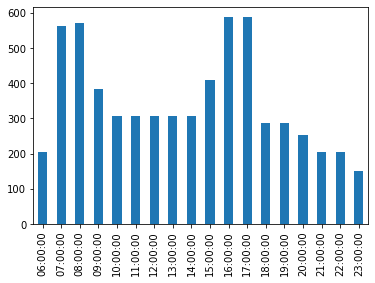

In [151]:
order = sorted(set(df["HOUR"]))
df['HOUR'].value_counts().loc[order].plot(kind='bar')

<AxesSubplot:>

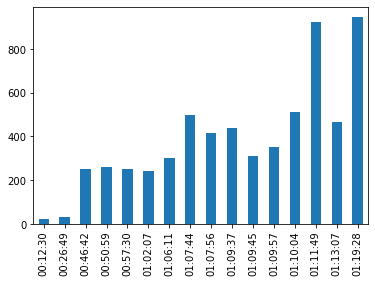

In [152]:
order = sorted(set(df["PLANNEDTIME"]))
df['PLANNEDTIME'].value_counts().loc[order].plot(kind='bar')

<AxesSubplot:>

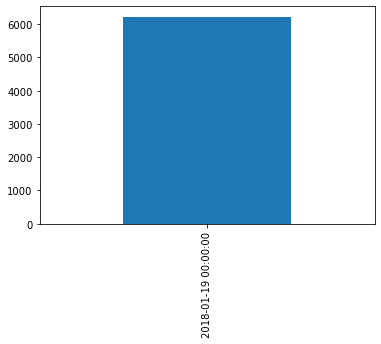

In [153]:
order = sorted(set(df["DATE"]))
df['DATE'].value_counts().loc[order].plot(kind='bar')

#### Categorical Features

<AxesSubplot:>

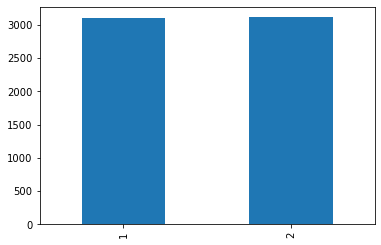

In [154]:
order = sorted(set(df["DIRECTION"]))
df['DIRECTION'].value_counts().loc[order].plot(kind='bar')

<AxesSubplot:>

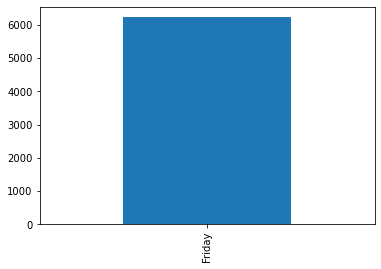

In [157]:
# This may have to change to use ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] but currently a reindex error is thrown because not all days are present.
order = sorted(set(df["WEEKDAY"]))
df['WEEKDAY'].value_counts().loc[order].plot(kind='bar')

<AxesSubplot:>

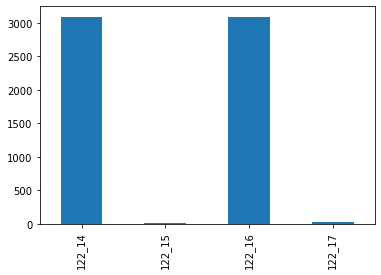

In [158]:
order = sorted(set(df["ROUTEID"]))
df['ROUTEID'].value_counts().loc[order].plot(kind='bar')

<AxesSubplot:>

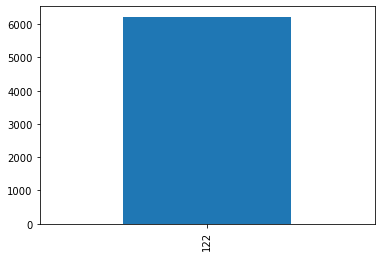

In [159]:
order = sorted(set(df["LINEID"]))
df['LINEID'].value_counts().loc[order].plot(kind='bar')

<AxesSubplot:>

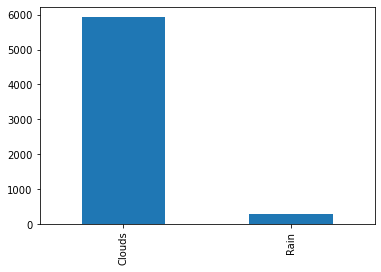

In [180]:
order = sorted(set(df["WEATHER"]))
df['WEATHER'].value_counts().loc[order].plot(kind='bar')

### Analysis
As discussed previously, there are more busses with depart times in the "Rush Hour" periods than in other periods during the day. The bulk of journeys take between 1:10:00 and 1:20:00 with the exception of some very fast routes which look to be related to the late night short journey busses. Outside of these there is little beneficial information to be seen at the moment.

### Data Quality Plan

| Variable Names | Data Quality Issue | Handling Strategy |
| :- | :- | :- |
| DATE | No issue | No action required
| TRIPID | No issue | No action required
| LINEID | No issue | No action required
| ROUTEID | No issue | No action required
| DIRECTION | No issue | No action required
| PLANNEDTIME | No issue | No action required
| ACTUALTIME | 619 missing values, this should be implied from stop arrival time if possible | Imply from alternative data as this is the target feature this needs to be be done with percision.
| ACTUALTIME_SECONDS | 619 missing values, this should be implied from stop arrival time if possible | Imply from alternative data as this is the target feature this needs to be be done with percision.
| HOUR | No issue | No action required
| PROGRNUMBER | No issue | No action required
| STOPPOINTID | No issue | No action required
| PLANNEDTIME_ARR | No issue | No action required
| PLANNEDTIME_DEP | Duplicate column of PLANNEDTIME_ARR | Drop column
| ACTUALTIME_ARR | No issue | No action required
| ACTUALTIME_DEP | No issue | No action required
| STOPID | 62 missing values due to stop 26 no longer being in operation | Drop impacted rows or look for alternative way of getting missing stops. Any fix will have to generalise to the larger data set.
| STOPNAME | 62 missing values due to stop 26 no longer being in operation | Drop impacted rows or look for alternative way of getting missing stops. Any fix will have to generalise to the larger data set.
| STOPLAT | 62 missing values due to stop 26 no longer being in operation | Drop impacted rows or look for alternative way of getting missing stops. Any fix will have to generalise to the larger data set.
| STOPLON | 62 missing values due to stop 26 no longer being in operation | Drop impacted rows or look for alternative way of getting missing stops. Any fix will have to generalise to the larger data set.
| TEMP | No issue | No action required
| WEATHER | No issue | No action required
| WEEKDAY | No issue | No action required




#### Explanation of Actions
##### No Action
Most features look to be good quality and little adjustment is needed.

##### Drop Columns
`PLANNEDTIME_DEP` is a duplicate of `PLANNEDTIME_ARR` at least in this set and should be dropped.

##### Drop Rows
`STOPID`, `STOPNAME`, `STOPLAT` and `STOPLON` each have 62 missing values due to the stop no longer being in service. These should be dropped but if the issue is larger when the analysis is extended to further data then a more taylored solution may be required to replace these stops.

##### Combining Values
No features will be combined


### Relationship Between Feature Pairs
`ACTUALTIME` will be the target feature of this data set and values will be plotted against this to understand it better.

(array([-25566.75      , -25566.66666667, -25566.58333333, -25566.5       ,
        -25566.41666667, -25566.33333333, -25566.25      , -25566.16666667,
        -25566.08333333]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

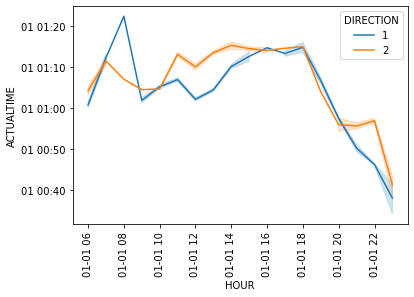

In [48]:
# set categorical order
df["HOUR"] = pd.Categorical(df["HOUR"], categories=sorted(set(df["HOUR"])), ordered=True)

sns.lineplot(data=df_clean, x="HOUR", y="ACTUALTIME", hue="DIRECTION", sort=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

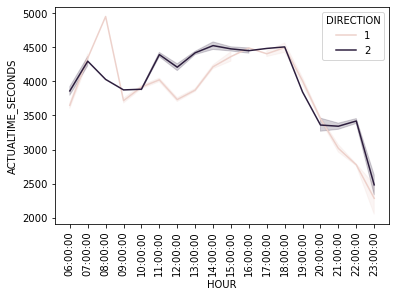

In [185]:
#df['ACTUALTIME_SECONDS'].value_counts().plot(kind='bar')

# set categorical order
df["HOUR"] = pd.Categorical(df["HOUR"], categories=sorted(set(df["HOUR"])), ordered=True)

sns.lineplot(data=df, x="HOUR", y="ACTUALTIME_SECONDS", hue="DIRECTION", sort=True)
plt.xticks(rotation=90)

#### Correlation Plots

In [196]:
df.columns

Index(['DATE', 'TRIPID', 'LINEID', 'ROUTEID', 'DIRECTION', 'PLANNEDTIME',
       'ACTUALTIME', 'ACTUALTIME_SECONDS', 'HOUR', 'PROGRNUMBER',
       'STOPPOINTID', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'STOPID', 'STOPNAME', 'STOPLAT', 'STOPLON',
       'DISTANCE_TRAVELLED', 'TEMP', 'WEATHER', 'WEEKDAY'],
      dtype='object')

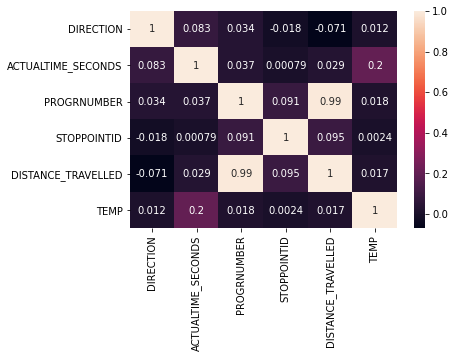

In [205]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_corr_data = df[['ROUTEID', 'DIRECTION', 'ACTUALTIME_SECONDS', 'PROGRNUMBER',
       'STOPPOINTID', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'DISTANCE_TRAVELLED', 'TEMP', 'WEATHER']]
corrMatrix = df_corr_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [193]:
# Define cramers v based on kaggle description: 
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

# Cramer's V allows us to perform a correlation analysis on categorical features which 
# will be useful in identifying trends in our data.

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [194]:
# Drop columns that we dont want to run through correlation
data = df_clean[[i for i in df_clean.columns if i not in ('DATE', 'LINEID', 'TRIPID', 'WEEKDAY')]]

# Encode target labels between 0-1
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 


for i in data.columns :
    data_encoded[i]=label.fit_transform(data[i])
    
# Building the matrix    
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)


    
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

# Show results
df_cramer

,ROUTEID,DIRECTION,PLANNEDTIME,ACTUALTIME,HOUR,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,STOPID,STOPNAME,STOPLAT,STOPLON,DISTANCE_TRAVELLED,TEMP,WEATHER,percent
ROUTEID,1.00,1.00,1.00,0.99,0.11,0.01,0.34,0.97,0.97,0.98,0.98,0.34,0.19,0.34,0.34,0.33,0.11,0.00,1.00
DIRECTION,1.00,1.00,1.00,0.98,0.01,0.02,1.00,0.94,0.94,0.95,0.95,1.00,0.56,1.00,1.00,0.98,0.01,0.00,1.00
PLANNEDTIME,1.00,1.00,1.00,0.99,0.41,0.00,0.07,0.97,0.97,0.97,0.97,0.07,0.04,0.07,0.07,0.07,0.34,0.11,1.00
ACTUALTIME,0.99,0.98,0.99,1.00,0.99,0.10,0.11,0.94,0.94,0.94,0.94,0.11,0.11,0.11,0.11,0.11,0.99,1.00,0.99
HOUR,0.11,0.01,0.41,0.99,1.00,0.00,0.00,0.98,0.98,0.98,0.98,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.11
PROGRNUMBER,0.01,0.02,0.00,0.10,0.00,1.00,1.00,0.95,0.95,0.95,0.96,1.00,0.75,1.00,1.00,1.00,0.00,0.00,0.01
STOPPOINTID,0.34,1.00,0.07,0.11,0.00,1.00,1.00,0.95,0.95,0.95,0.96,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.34
PLANNEDTIME_ARR,0.97,0.94,0.97,0.94,0.98,0.95,0.95,1.00,1.00,0.95,0.96,0.95,0.95,0.95,0.95,0.96,0.98,0.96,0.97
PLANNEDTIME_DEP,0.97,0.94,0.97,0.94,0.98,0.95,0.95,1.00,1.00,0.95,0.96,0.95,0.95,0.95,0.95,0.96,0.98,0.96,0.97
ACTUALTIME_ARR,0.98,0.95,0.97,0.94,0.98,0.95,0.95,0.95,0.95,1.00,0.96,0.95,0.95,0.95,0.95,0.95,0.98,0.97,0.98


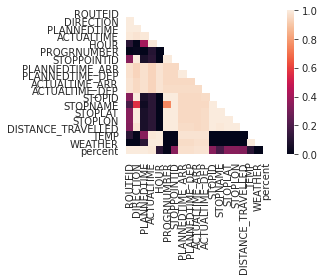

In [206]:
# triu_indices returns the upper triangular for the matrix
mask = np.zeros_like(df_cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set color scheme
with sns.axes_style("white"):
    ax = sns.heatmap(df_cramer, mask=mask,vmin=0., vmax=1, square=True)
    
    
plt.tight_layout()
plt.savefig('CramerHeatmapBasic.png')
plt.show()

#### Analysis

### Transform and Extend Data
- Time should be used as seconds not as human readable time
- Day of week was added based on date
- Is holiday/is weekend date should be considered e.g. for holidays sunday bus times apply
- Get distance between stops for each pair of stops
- Get list of stops per route